# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import numpy as np
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee = pd.read_csv('./Employee.csv')
employee


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
# your answer here-1st way
'''
L.S. Good!
'''

employee.groupby(['Department'])[['Salary']].agg(np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [7]:
# your answer here-2nd way
employee.pivot_table(index=["Department"], values=["Salary"])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [8]:
# your answer here
employee.pivot_table(index=["Department"], columns=["Title"], values=["Salary"])

Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [10]:
# your answer here
'''
L.S. Well done!
'''

employee.pivot_table(index=["Title"], values=["Salary", "Years"], aggfunc=np.sum)

,Salary,Years
Title,,
VP,140,16
analyst,130,9
associate,170,12


In [11]:
employee.pivot_table(index=["Title"], values=["Salary", "Years"])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [13]:
# your answer here

'''
L.S. Good to use a anonymous function. Very nice!
'''

employee.pivot_table(index=["Department"], columns = ['Title'], values=['Salary', 'Name'], 
                     fill_value=0, aggfunc={'Salary': np.mean, 'Name': lambda x: len(x.unique())})


Name                   Salary                  
Title        VP analyst associate     VP analyst associate
Department                                                
HR            1       2         0     70    32.5         0
IT            1       2         1     70    32.5        60
Sales         0       0         2      0     0.0        55

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [14]:
# your answer here
'''
L.S. Why did you fill the values with 0? Please explain next time. 
'''

employee.pivot_table(index=["Department"], columns = ['Title'], values=['Salary'], fill_value=0, aggfunc={'Salary': [np.mean, np.std, np.min, np.max]})

Salary                                                        \
             amax                   amin                   mean           
Title          VP analyst associate   VP analyst associate   VP analyst   
Department                                                                
HR             70      35         0   70      30         0   70    32.5   
IT             70      35        60   70      30        60   70    32.5   
Sales           0       0        55    0       0        55    0     0.0   

                                              
                     std                      
Title      associate  VP   analyst associate  
Department                                    
HR                 0   0  3.535534         0  
IT                60   0  3.535534         0  
Sales             55   0  0.000000         0

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
# your answer here


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [15]:
# your answer here
employee.pivot_table(index=["Department"], values=['Salary', 'Name'], 
                     fill_value=0, aggfunc={'Salary': np.sum, 'Name': lambda x: len(x.unique())})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [17]:
# your answer here
'''
L.S. Good! 
'''

employee.pivot_table(index=["Department"], columns=['Title'], values=['Salary', 'Years'], 
                     fill_value=0, aggfunc={'Salary': np.mean, 'Years': np.sum})

Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR             70    32.5         0     8       6         0
IT             70    32.5        60     8       3         7
Sales           0     0.0        55     0       0         5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [18]:
# your answer here--Your custom function here
        

In [19]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [20]:
# your answer here
fitbit = pd.read_csv('./Fitbit.csv')
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [21]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [22]:
# your answer here
fitbit.select_dtypes(include = 'number').head()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [23]:
fitbit.select_dtypes(exclude = 'number').head()

,Date
0,08-05-2015
1,09-05-2015
2,10-05-2015
3,11-05-2015
4,12-05-2015


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [25]:
# your answer here
'''
L.S. Correct!
'''

fitbit[["Minutes Fairly Active", "Steps"]].corr()

,Minutes Fairly Active,Steps
Minutes Fairly Active,1.000000,0.303244
Steps,0.303244,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

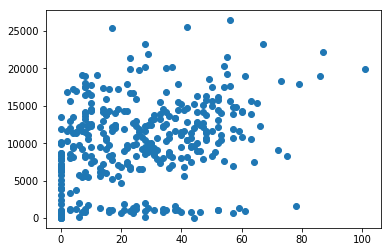

In [26]:
# your answer here
'''
L.S. Very good!
'''

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x=fitbit['Minutes Fairly Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [27]:
# your comment here\
'''
L.S. Indeed!
'''

# range of values on plot is very big and correlation closer to zeroю It means these variables are independent

'\nL.S. Indeed!\n'

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [28]:
# your answer here
fitbit[["Minutes Sedentary", "Steps"]].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

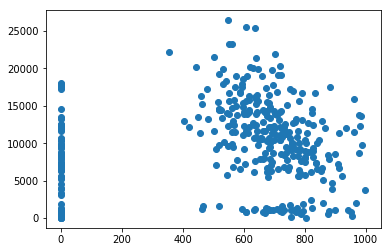

In [30]:
# your answer here
'''
L.S. Well done!
'''

plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

In [31]:
# Your comment here
#Correlation is closer to 1 and range of values is't different. So these variables is depended on each other

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [32]:
# your answer here
fitbit[["MinutesOfSleep", "Steps"]].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

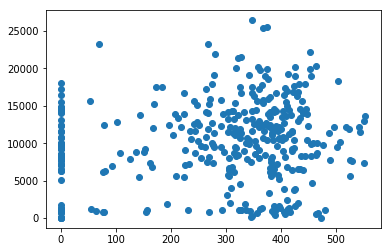

In [33]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [34]:
# your answer here
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()

In [35]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [37]:
# your answer here
'''
L.S. Well done!
'''

cor_fit.sort_values('Steps', ascending = False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [38]:
# your answer here
import seaborn as sns

time_grades = pd.read_csv('./Time_Grades.csv')

In [39]:
#Print time_grades
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

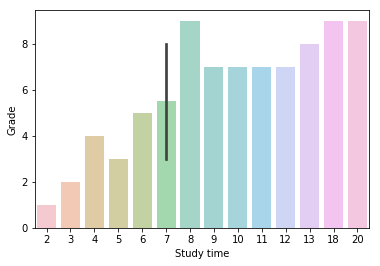

In [41]:
# your answer here
'''
L.S. Very nice!
'''

sns.barplot(x="Study time", y="Grade", data=time_grades, alpha = 0.5)

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [42]:
# your answer here-Pearson 
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [43]:
## your answer here-Spearman
time_grades.corr(method='spearman')

#pearson : standard correlation coefficient
#spearman : Spearman rank correlation
# these are different types of correlations

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

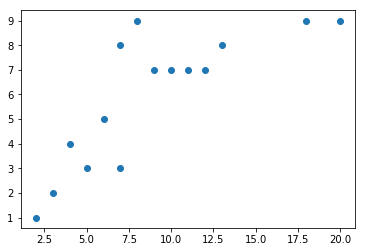

In [44]:
# your answer here
'''
L.S. Good!
'''

plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

In [34]:
#your comment here
# These two variables are dependent on each other. The bigger Study time, the bigger Grade

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here
# Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships